# Temat testów - ANALIZA MAPA A VS MAPA B

– Czy istnieje istotna statystycznie różnica w całkowitej długości fiksacji/wizyt między grupami mapa A vs mapa B?

– Czy istnieje istotna statystycznie różnica w średniej długości fiksacji/wizyt między grupami mapa A vs mapa B?

– Czy istnieje istotna statystycznie różnica w liczbie fiksacji/wizyt między grupami mapa A vs mapa B?

– Czy istnieje istotna statystycznie różnica w średniej całkowitych długości fiksacji/wizyt między grupami mapa A vs mapa B?

– Czy istnieje istotna statystycznie różnica w średniej średnich długości fiksacji/wizyt między grupami mapa A vs mapa B?

– Czy istnieje istotna statystycznie różnica w średniej średnich wielkości źrenicy między grupami mapa A vs mapa B?


In [104]:
import pandas as pd

from functions.tests.dependent_groups.two_groups import ttest_or_wilcoxon
from functions.plots import plot_multi_boxplot, plot_multi_density, plot_two_boxplots

In [105]:
df = pd.read_csv('/Users/martasolarz/Studies/Thesis/Master_thesis/prepare_datasets/sets/mapaA_vs_mapaB.csv', index_col='idx')

df.sample(3)

,ID,Total_fix_1,Total_fix_2,Total_fix_3,Sum_TotalFix,Avg_TotalFix,Avg_fix_1,Avg_fix_2,Avg_fix_3,Sum_AvgFix,...,Avg_visit_2,Avg_visit_3,Sum_AvgVisit,Avg_AvgVisit,Num_visit_1,Num_visit_2,Num_visit_3,Sum_NumVisit,Avg_NumVisit,Group
idx,,,,,,,,,,,,,,,,,,,,,
32,45,21132,6932,5291,33355,11118.333333,220.0,267.0,241.0,728.0,...,1088.0,2161.0,5462.0,1820.666667,11,7,3,21,7.000000,B
21,7,37060,17950,46771,101781,33927.000000,181.0,199.0,244.0,624.0,...,7780.0,9589.0,29831.0,9943.666667,4,3,6,13,4.333333,A
19,4,31196,5800,31790,68786,22928.666667,190.0,181.0,197.0,568.0,...,2012.0,11489.0,27378.0,9126.000000,3,4,4,11,3.666667,A


In [106]:
ALPHA = 0.05

In [107]:
results = []
def test(data, columns, results=results):
    for col in columns:
        results.append('\n')
        results.append(col)
        print('--------------------------')
        print(col)
        A = data[col][data['Group'] == 'A']
        B = data[col][data['Group'] == 'B']
        p = ttest_or_wilcoxon([A, B], ALPHA)
        results.append(p)
        
def plots(data, columns, type=''):
    for col in columns:
        # plot_multi_density(data, col, 'Group', col, 'Grupa')
        # plot_multi_boxplot(data, 'Group', col, 'Grupa', col)
        if col.startswith('Num') or col.startswith('Sum_Num') or col.startswith('Avg_Num'):
            plot_two_boxplots(data[col][data['Group'] == 'A'], data[col][data['Group'] == 'B'], 'A *', 'B *', label = f'Liczba {type}', title='')
        else:
            if col.startswith('Total') or col.startswith('Sum_Total') or col.startswith('Avg_Total'):
                lab = 'Całkowity'
            else:
                lab = 'Średni'
            plot_two_boxplots(data[col][data['Group'] == 'A']/1000, data[col][data['Group'] == 'B']/1000, 'A *', 'B *', label=f'{lab} czas {type} [s]', title='')

In [108]:
fixations = df.columns[1:16]
pupil = df.columns[16:20]
visits = df.columns[20:-1]
visits

Index(['Total_visit_1', 'Total_visit_2', 'Total_visit_3', 'Sum_TotalVisit',
       'Avg_TotalVisit', 'Avg_visit_1', 'Avg_visit_2', 'Avg_visit_3',
       'Sum_AvgVisit', 'Avg_AvgVisit', 'Num_visit_1', 'Num_visit_2',
       'Num_visit_3', 'Sum_NumVisit', 'Avg_NumVisit'],
      dtype='object')

/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_1650/3439248904.py:36: UserWarning: 
The palette list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(data=df_long, x='Pair', y='Value', hue='Pair', palette=colors, hue_order=hue_order, width=0.4)
/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_1650/3439248904.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


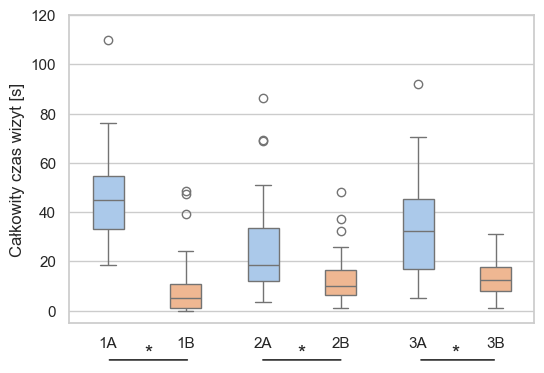

In [125]:
# df = df.copy()
# for col in df.columns[1:-1]:
#     df[col] = df.apply(lambda row: row[col]*4 if row['Group'] == 'B' else row[col], axis=1)
df = df.copy()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
var = 'Total'
typee = 'visit'

value_vars=[f'{var}_{typee}_1', f'{var}_{typee}_2', f'{var}_{typee}_3']
for val in value_vars:
    df[val] = df[val]/1000

df_new = pd.DataFrame()

# Concatenate values based on 'Group'
for i, col in enumerate(value_vars):
    df_new[f'{i+1}A_{var}_{typee}'] = df[col][df['Group'] == 'A'].values
    df_new[f'{i+1}B_{var}_{typee}'] = df[col][df['Group'] == 'B'].values


df_long = pd.melt(df_new, value_vars=[f'1A_{var}_{typee}', f'1B_{var}_{typee}', f'2A_{var}_{typee}', f'2B_{var}_{typee}', f'3A_{var}_{typee}', f'3B_{var}_{typee}'],
                  var_name='Pair', value_name='Value')

# Generate boxplot
colors = sns.color_palette('pastel', n_colors=2)
hue_order = [f'1A_{var}_{typee}', f'1B_{var}_{typee}', f'2A_{var}_{typee}', f'2B_{var}_{typee}', f'3A_{var}_{typee}', f'3B_{var}_{typee}']

labels = ['1A', '1B', '2A', '2B', '3A', '3B']

sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
plt.ylim(-5,120)
# plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
ax = sns.boxplot(data=df_long, x='Pair', y='Value', hue='Pair', palette=colors, hue_order=hue_order, width=0.4)
# 
plt.annotate(
    '', xy=(0.08, -0.12), xycoords='axes fraction', xytext=(0.26, -0.12),
    textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
plt.annotate('*', xy=(0.17, -0.13), xycoords='axes fraction', textcoords='axes fraction',
             ha='center', va='bottom', fontsize=15)

plt.annotate(
    '', xy=(0.41, -0.12), xycoords='axes fraction', xytext=(0.59, -0.12),
    textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
plt.annotate('*', xy=(0.5, -0.13), xycoords='axes fraction', textcoords='axes fraction',
             ha='center', va='bottom', fontsize=15)

plt.annotate(
    '', xy=(0.75, -0.12), xycoords='axes fraction', xytext=(0.92, -0.12),
    textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
plt.annotate('*', xy=(0.83, -0.13), xycoords='axes fraction', textcoords='axes fraction',
             ha='center', va='bottom', fontsize=15)
plt.xlabel('')
ax.set_xticklabels(labels)
plt.ylabel('Całkowity czas wizyt [s]')
plt.show()

In [110]:
# fiksacje

test(df, fixations)

--------------------------
Total_fix_1
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 13.0
p-value: 1.6007106751203537e-10
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
--------------------------
Total_fix_2
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 166.0
p-value: 0.000714401952791377
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
--------------------------
Total_fix_3
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 78.0
p-value: 1.1621450539678335e-06
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
--------------------------
Sum_TotalFix
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 11.0
p-value: 1.000444171950221e-10
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
--------------------------
Avg_TotalFix
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 11.0
p-value: 1.000444171950

In [111]:
fixations

Index(['Total_fix_1', 'Total_fix_2', 'Total_fix_3', 'Sum_TotalFix',
       'Avg_TotalFix', 'Avg_fix_1', 'Avg_fix_2', 'Avg_fix_3', 'Sum_AvgFix',
       'Avg_AvgFix', 'Num_fix_1', 'Num_fix_2', 'Num_fix_3', 'Sum_NumFix',
       'Avg_NumFix'],
      dtype='object')

/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_1650/2026389768.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x=category_param, y=new, orient="v", width=0.6, palette='pastel')
/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_1650/2026389768.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['A', 'B'])


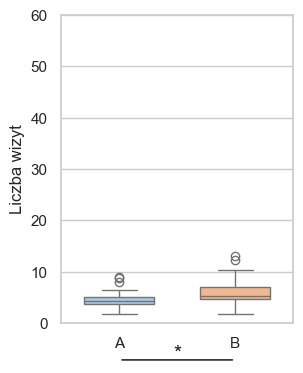

In [112]:
def plot_multi_boxplot_t(df: pd.DataFrame, category_param: str, continue_param: str, label_category: str, label_continue: str, title: str = "Boxplot dla grup"):
    # sns.set(style="whitegrid")
    plt.figure(figsize=(3, 4))
    new = df[continue_param]
    ax = sns.boxplot(data=df, x=category_param, y=new, orient="v", width=0.6, palette='pastel')
    # plt.title(title)
    plt.grid(True, axis='y')
    plt.xlabel('')
    plt.ylim(0,60)
    plt.ylabel(label_continue)

    ax.set_xticklabels(['A', 'B'])
    
    plt.annotate(
    '', xy=(0.25, -0.12), xycoords='axes fraction', xytext=(0.75, -0.12),
    textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
    plt.annotate('*', xy=(0.5, -0.13), xycoords='axes fraction', textcoords='axes fraction',
             ha='center', va='bottom', fontsize=15)

    plt.show()
    
# plot_multi_boxplot_t(df['Avg_TotalFix_OnlyCom'][df['Group'] == 'A']/1000, df['Avg_TotalFix_OnlyCom'][df['Group'] == 'B']/1000, 'A', 'B', 'Całkowity czas fiksacji [s]', '')
plot_multi_boxplot_t(df, 'Group', 'Avg_NumVisit', 'Grupa grafik', 'Liczba wizyt', 'Boxplot dla grup')

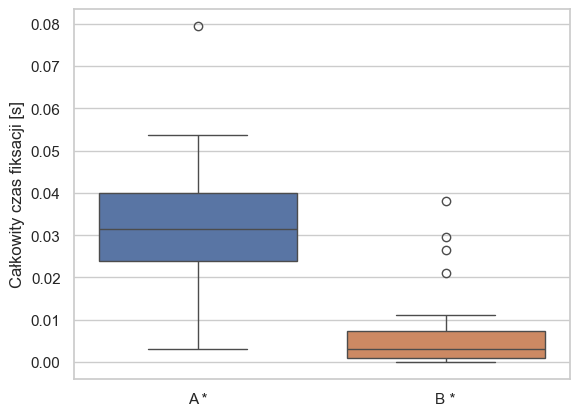

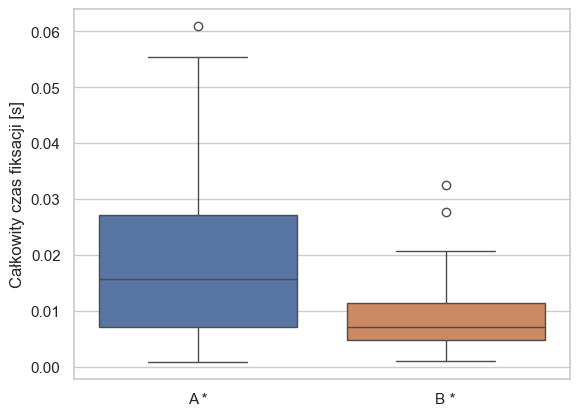

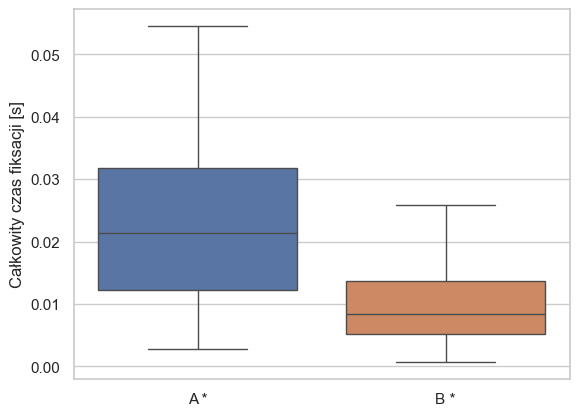

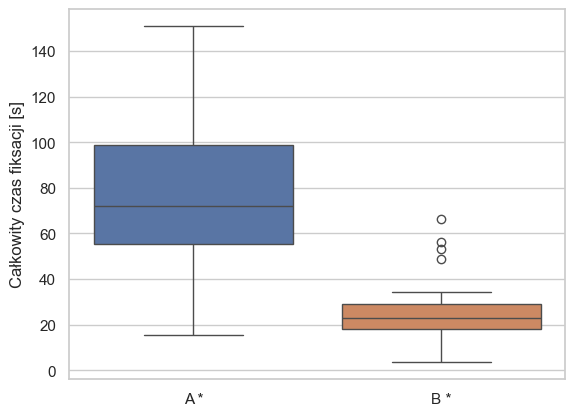

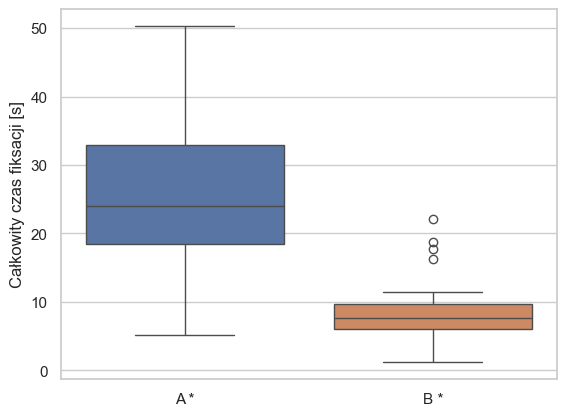

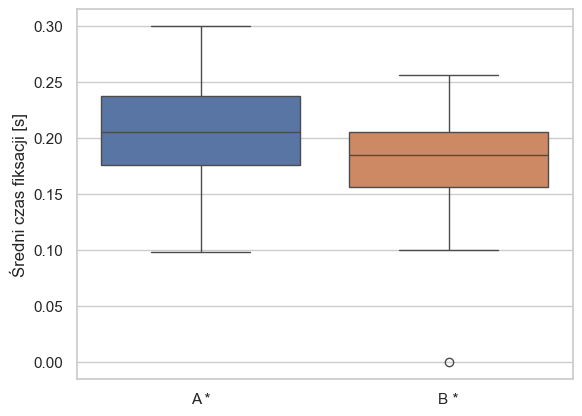

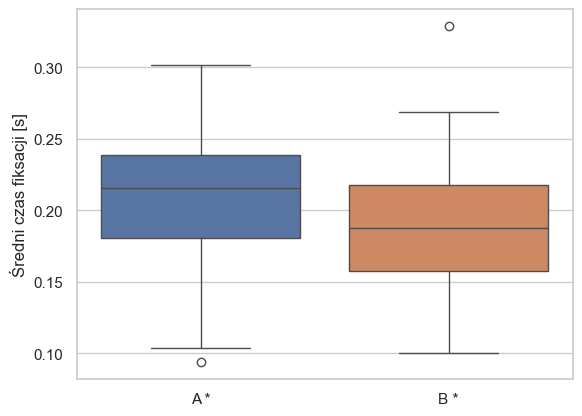

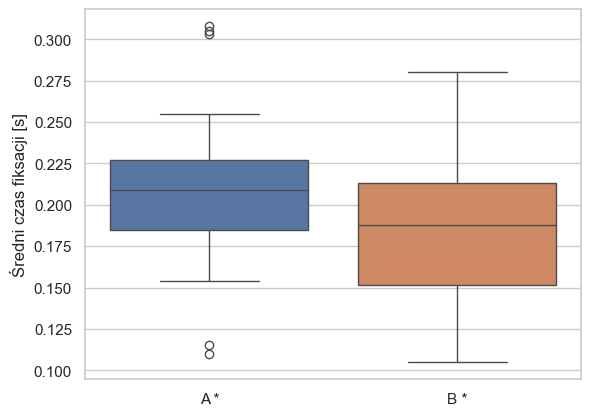

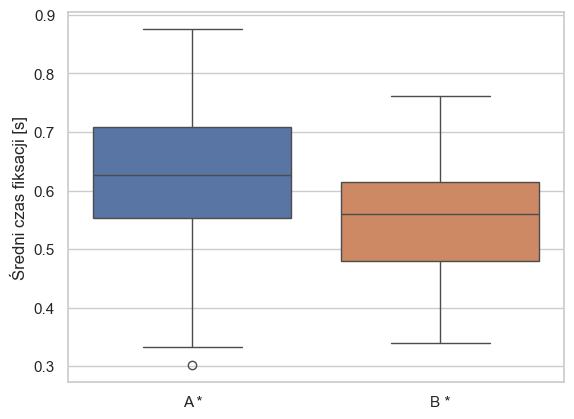

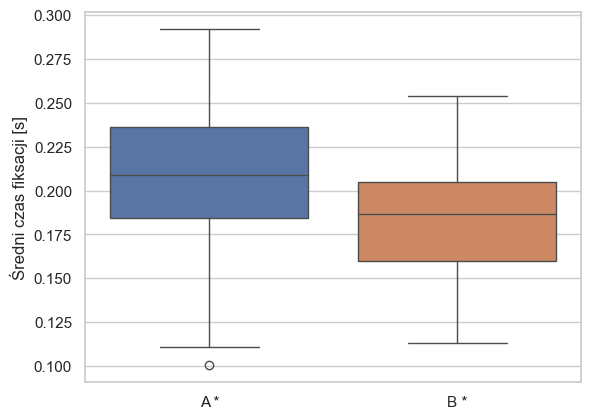

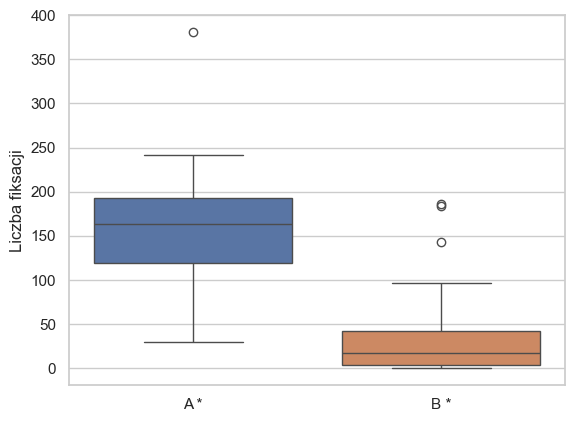

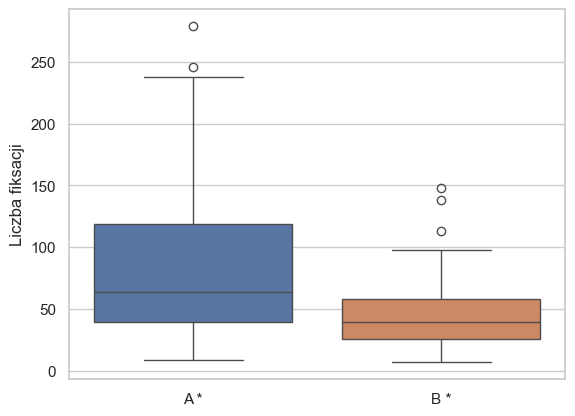

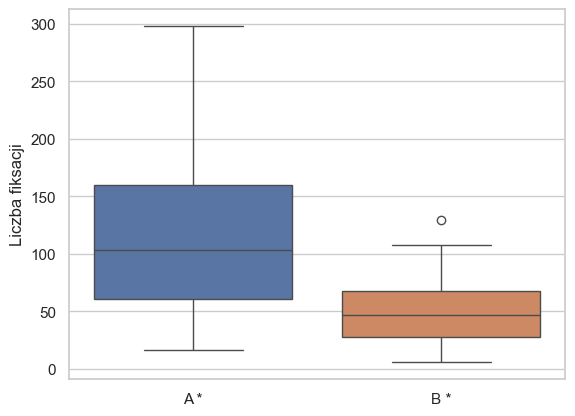

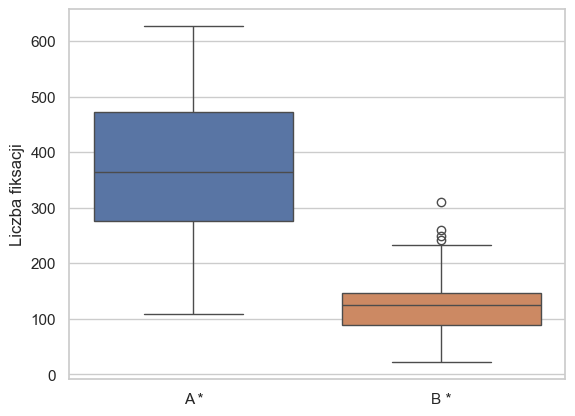

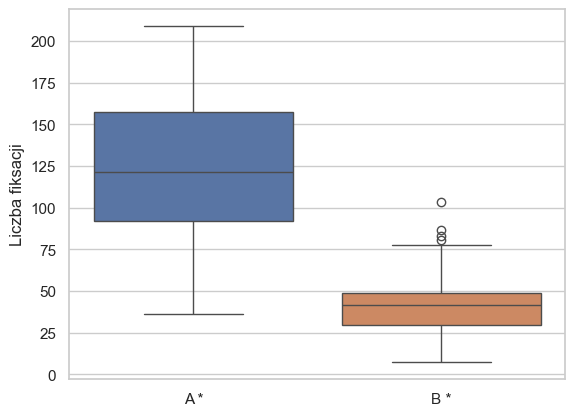

In [113]:
plots(df, fixations, 'fiksacji')

In [114]:
# średnia wielkość źrenicy

test(df, pupil)

--------------------------
Avg_pupil_1
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 397.0
p-value: 0.8680334030395898
Brak podstaw do odrzucenia H0.
--------------------------
Avg_pupil_2
Conducting normality test...
Conducting homogeneity variance test...
Conducting t-test...
t-statistic: -1.71779604134678
p-value: 0.09376542235943464
Brak podstaw do odrzucenia H0.
--------------------------
Avg_pupil_3
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 391.0
p-value: 0.8057269839482615
Brak podstaw do odrzucenia H0.
--------------------------
Avg_AvgPupil
Conducting normality test...
Conducting homogeneity variance test...
Conducting t-test...
t-statistic: 0.3476832609734674
p-value: 0.729947610280429
Brak podstaw do odrzucenia H0.


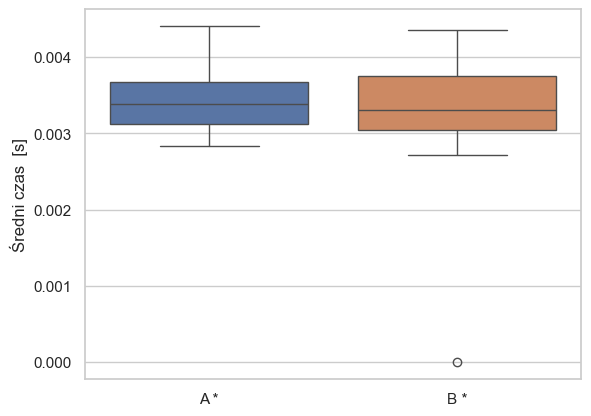

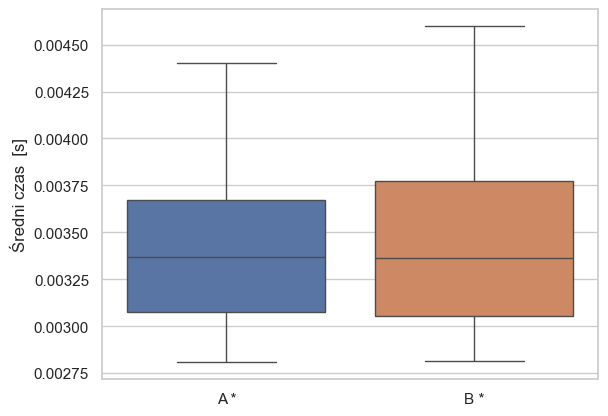

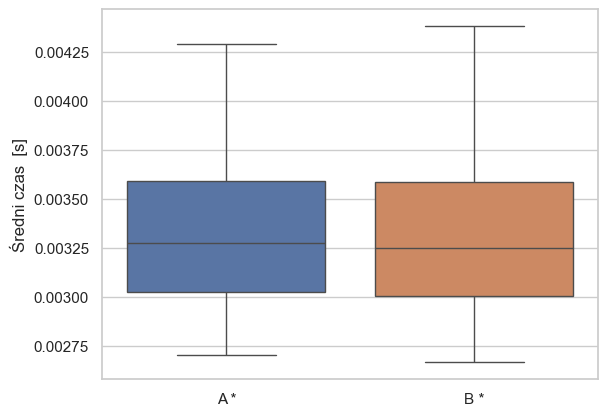

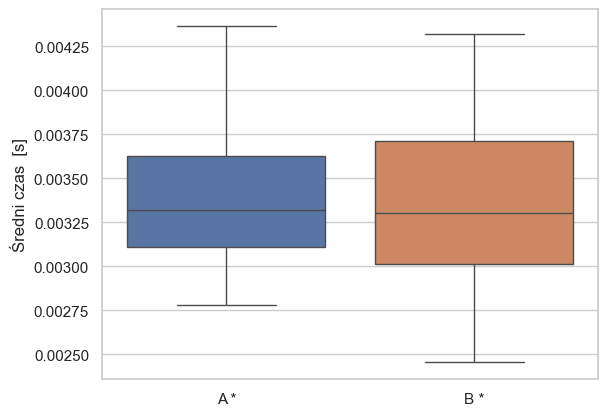

In [115]:
plots(df, pupil)

In [116]:
# wizyty

test(df, visits)

--------------------------
Total_visit_1
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 15.0
p-value: 2.4920154828578234e-10
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
--------------------------
Total_visit_2
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 169.0
p-value: 0.0008436624721070984
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
--------------------------
Total_visit_3
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 71.0
p-value: 5.841629899805412e-07
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
--------------------------
Sum_TotalVisit
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 6.0
p-value: 2.546585164964199e-11
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
--------------------------
Avg_TotalVisit
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 6.0
p-value: 2.5465

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


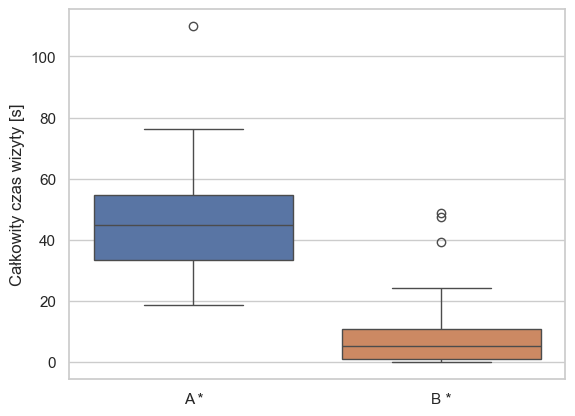

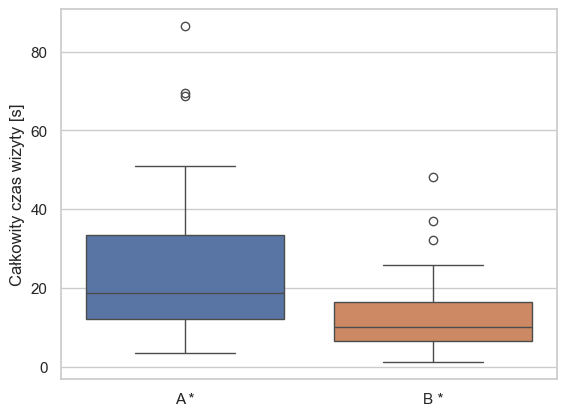

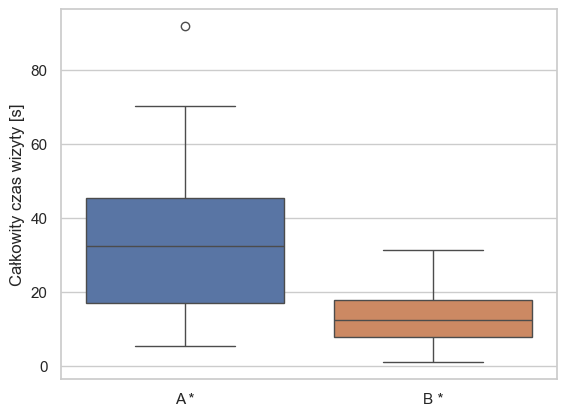

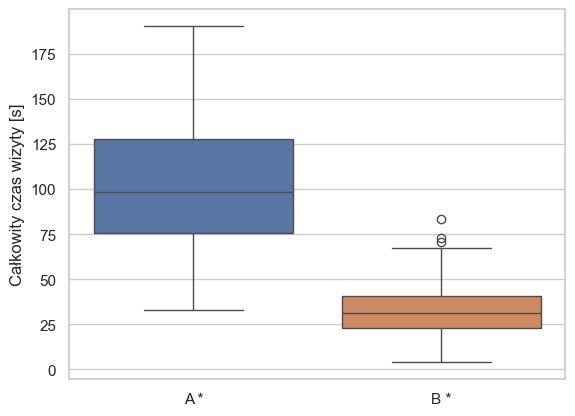

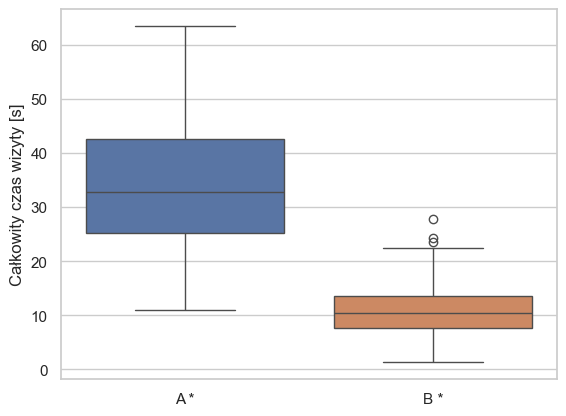

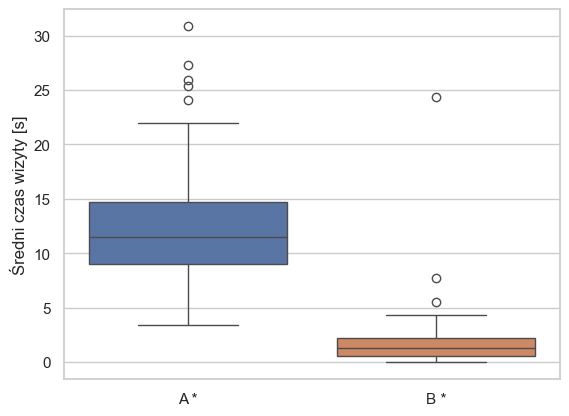

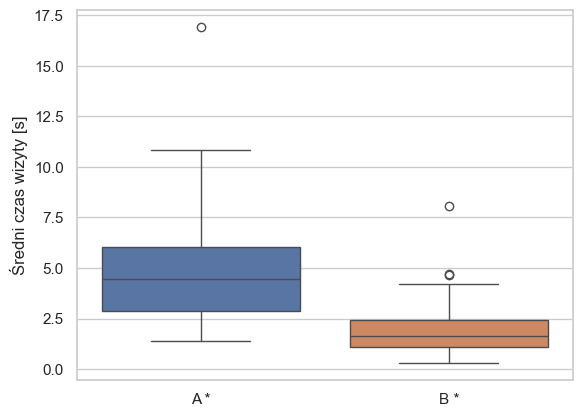

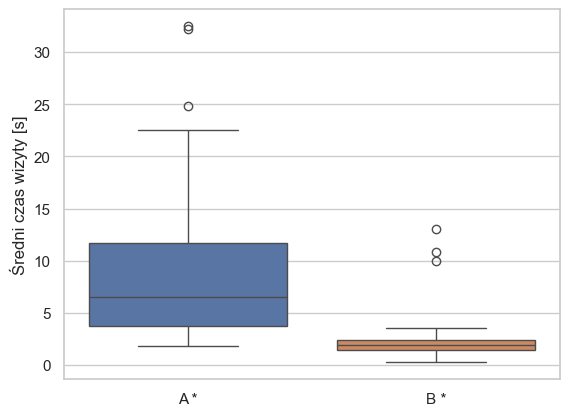

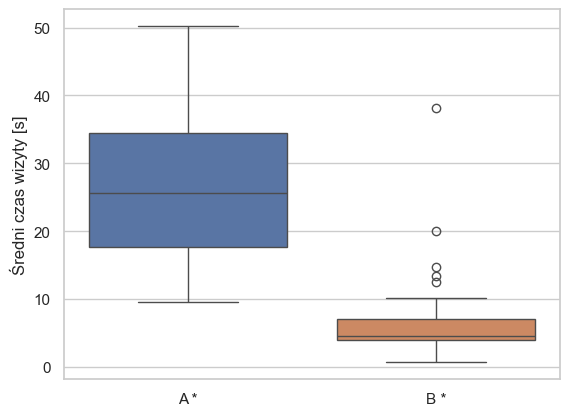

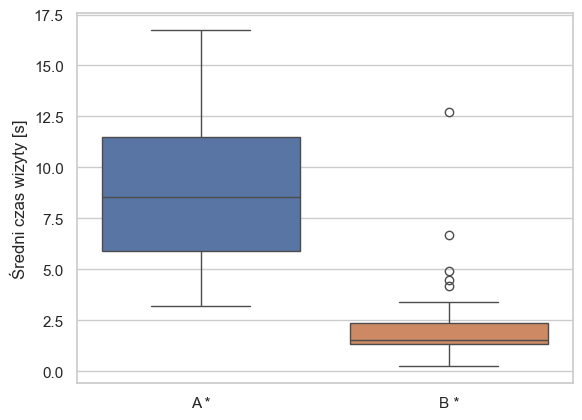

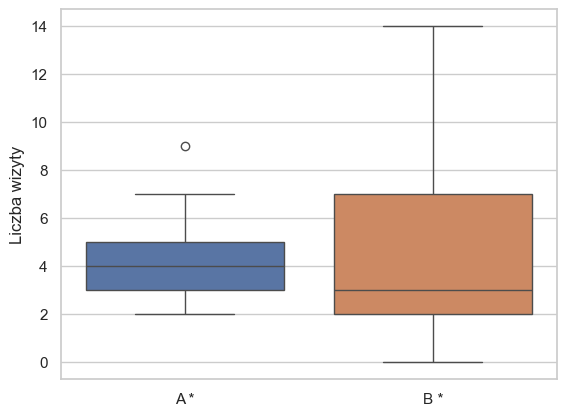

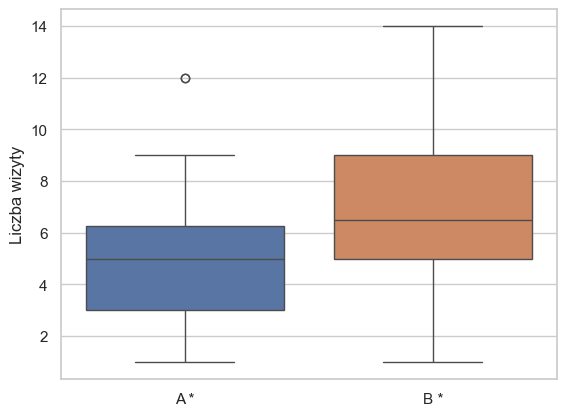

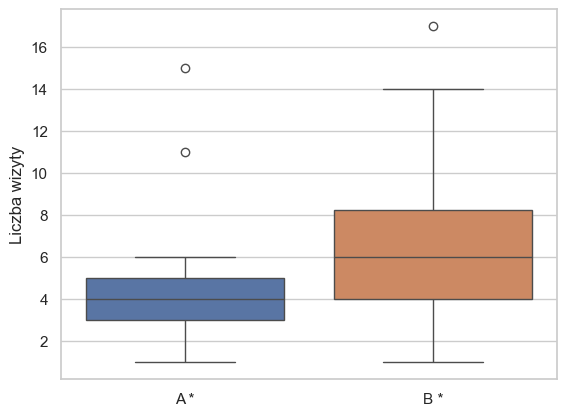

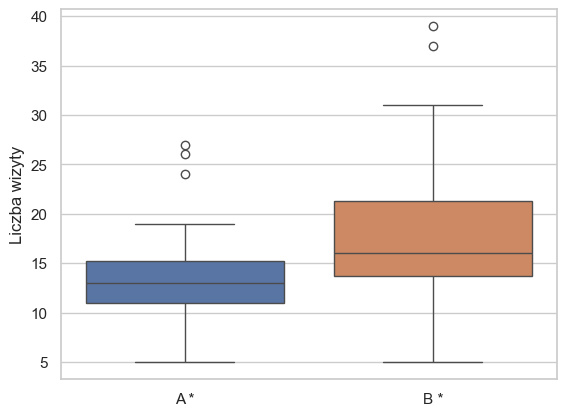

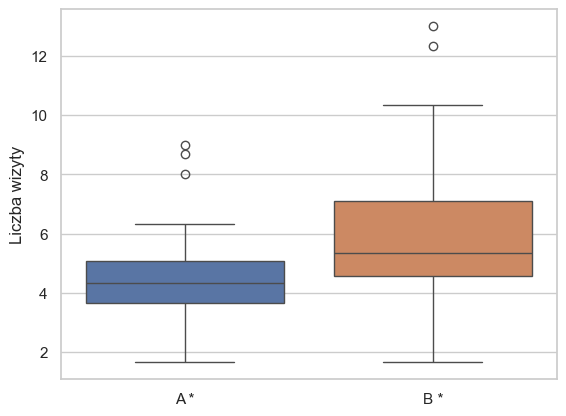

In [117]:
plots(df, visits, 'wizyty')

Podsumowanie:

Istotne statystycznie różnice we wszystkich badanych zagadnieniach i grupach między mapą A, a mapą B (poza: num_visit_1 i wielkości źrenicy (wszystkie przypadki))

Sprawdzenie dla danych B wymnożonych * 4 (bo mamy 4 elementy na które wzrok się rozkładał, czy wtedy nadal będzie tak samo?

In [118]:
df_multiply = df.copy()
for col in df_multiply.columns[1:-1]:
    df_multiply[col] = df_multiply.apply(lambda row: row[col]*4 if row['Group'] == 'B' else row[col], axis=1)

In [119]:
# fiksacje
test(df_multiply, fixations)

--------------------------
Total_fix_1
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 212.0
p-value: 0.006955192886380246
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
--------------------------
Total_fix_2
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 175.0
p-value: 0.0011671793090499705
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
--------------------------
Total_fix_3
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 166.0
p-value: 0.000714401952791377
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
--------------------------
Sum_TotalFix
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 224.0
p-value: 0.011536851214259514
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
--------------------------
Avg_TotalFix
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 224.0
p-value: 0.011536851214

/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_1650/2026389768.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x=category_param, y=new, orient="v", width=0.6, palette='pastel')
/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_1650/2026389768.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['A', 'B'])


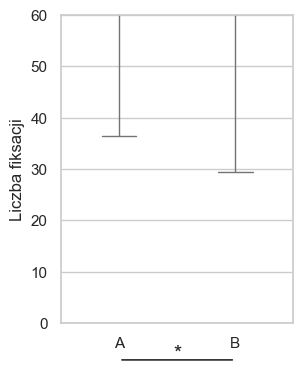

In [120]:
plot_multi_boxplot_t(df_multiply, 'Group', 'Avg_NumFix', 'Grupa grafik', 'Liczba fiksacji', 'Boxplot dla grup')

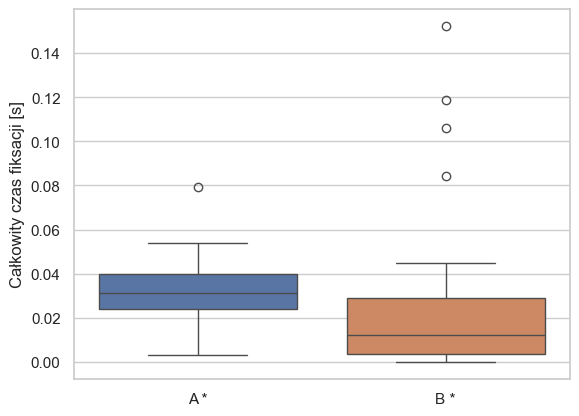

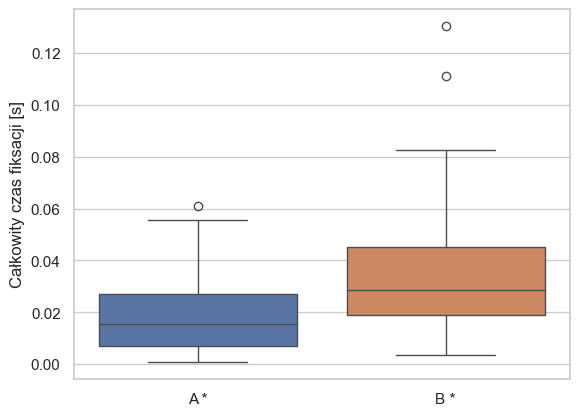

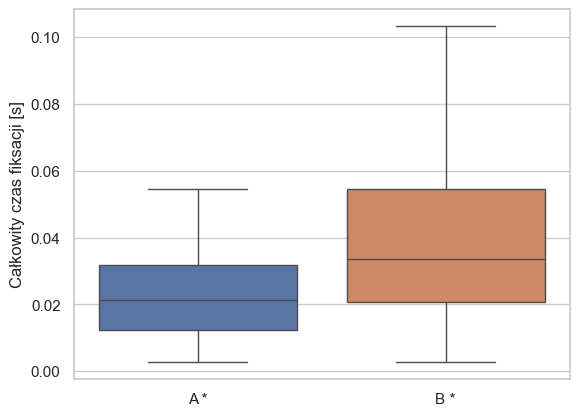

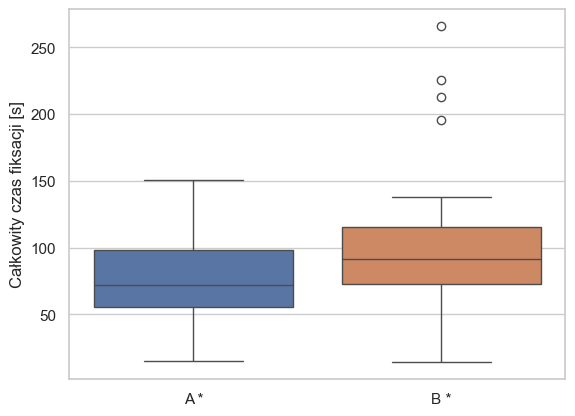

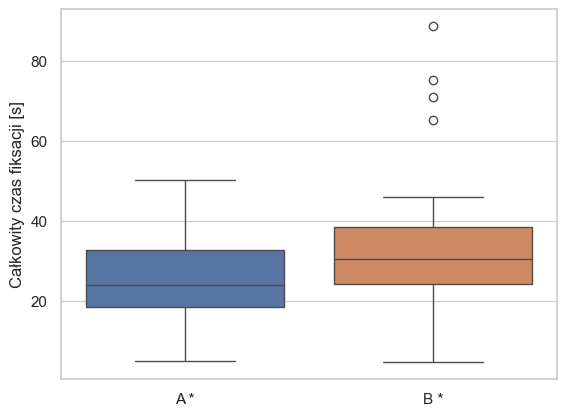

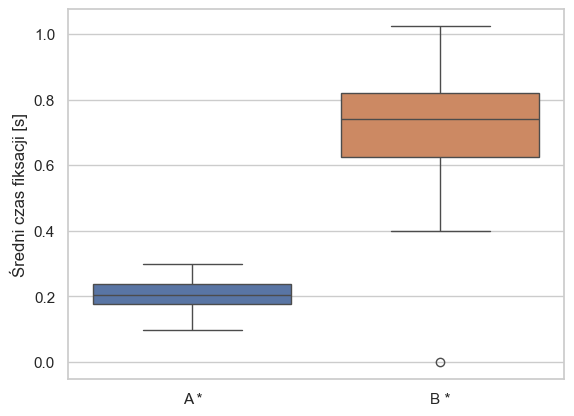

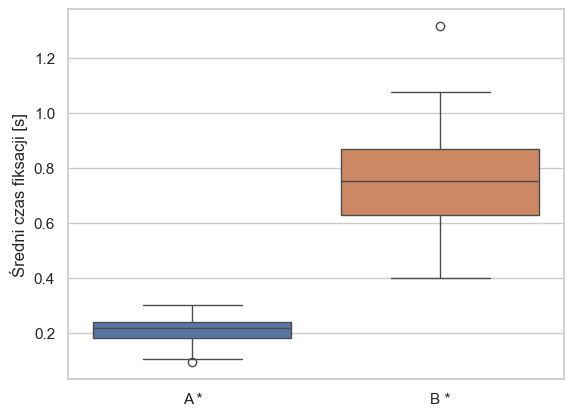

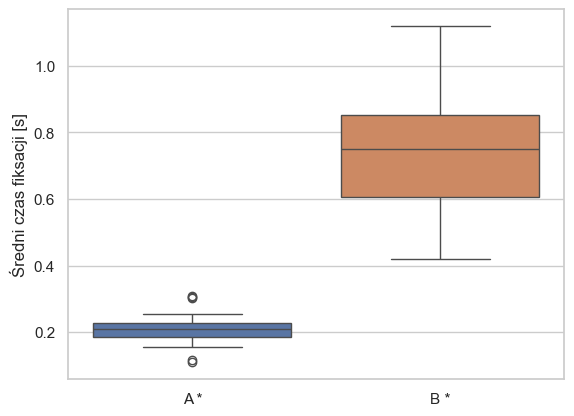

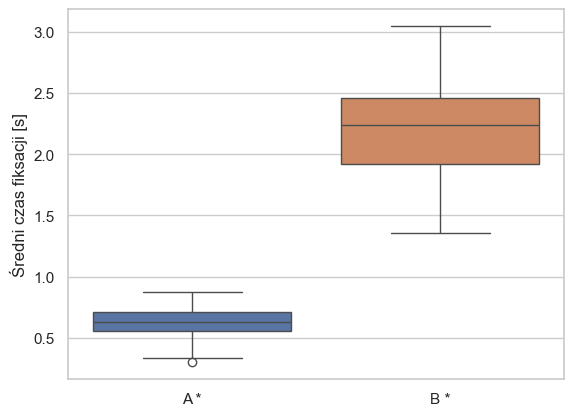

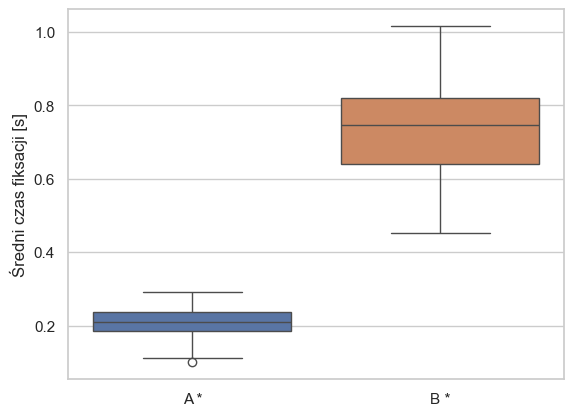

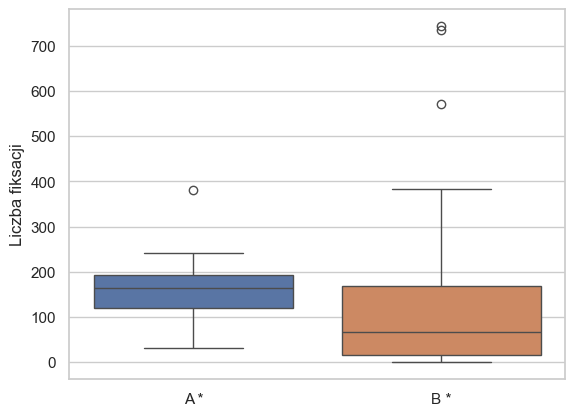

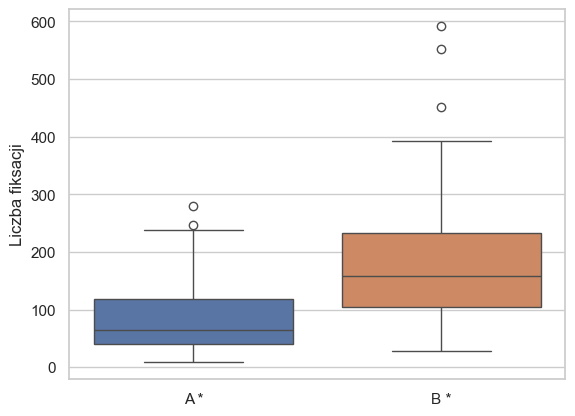

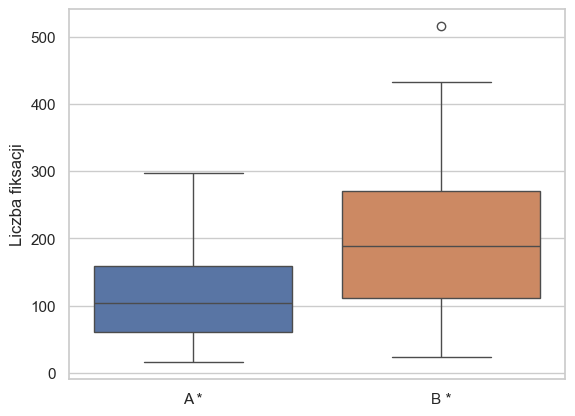

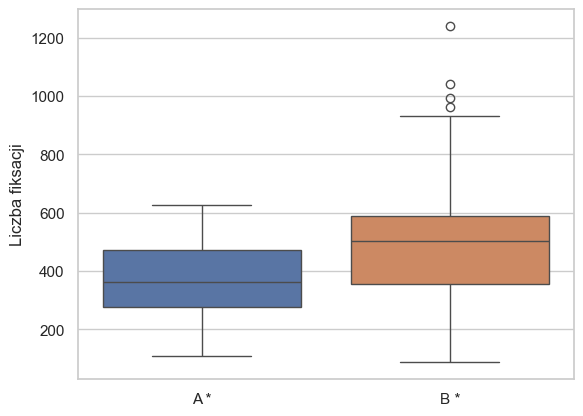

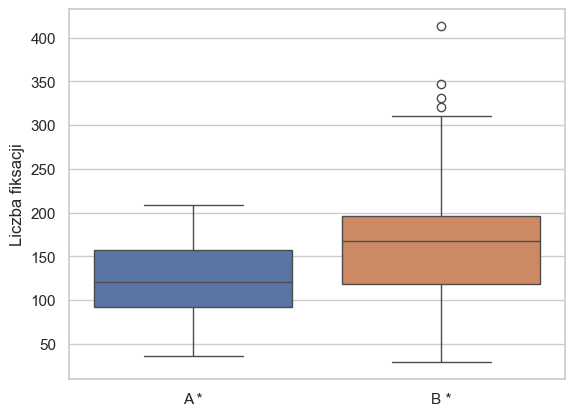

In [121]:
plots(df_multiply, fixations, 'fiksacji')

In [122]:
# wizyty
test(df_multiply, visits)

--------------------------
Total_visit_1
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 238.0
p-value: 0.01998793531311094
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
--------------------------
Total_visit_2
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 177.0
p-value: 0.0012975311765330844
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
--------------------------
Total_visit_3
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 158.0
p-value: 0.0004523318730207393
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
--------------------------
Sum_TotalVisit
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 220.0
p-value: 0.009781997654499719
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
--------------------------
Avg_TotalVisit
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 220.0
p-value: 0.00

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


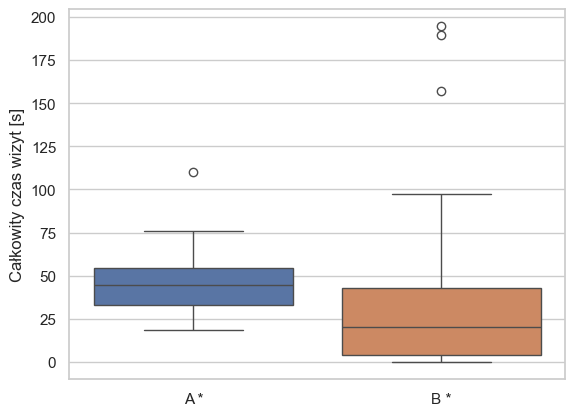

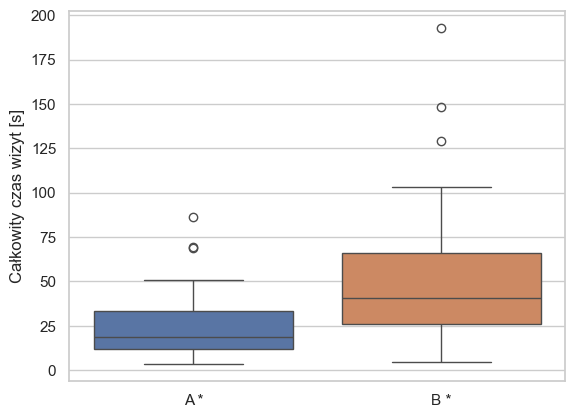

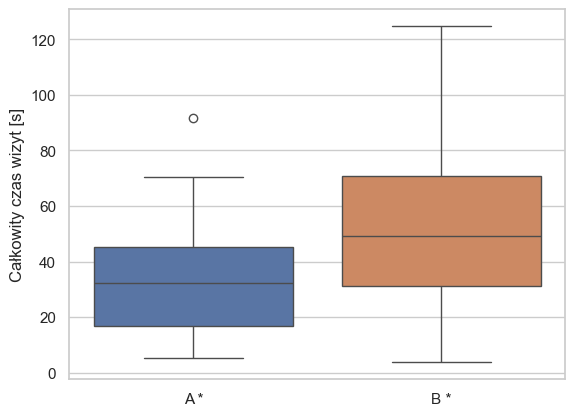

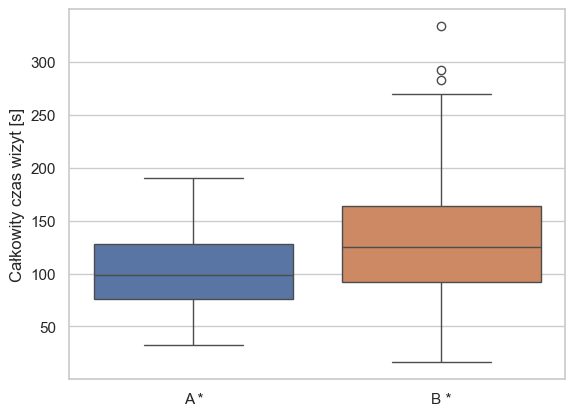

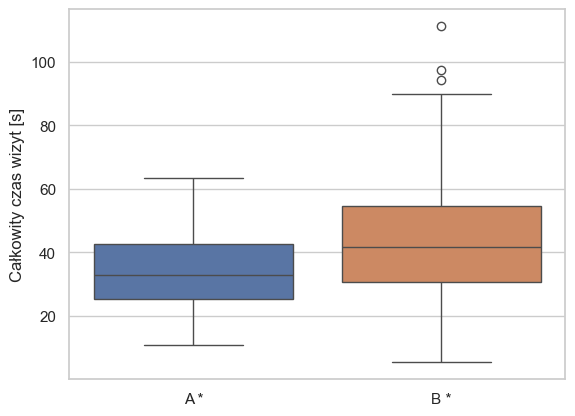

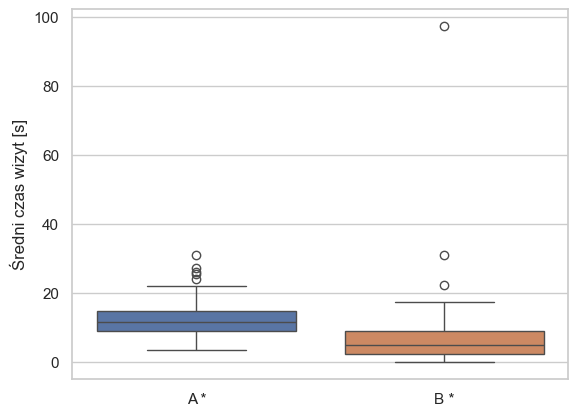

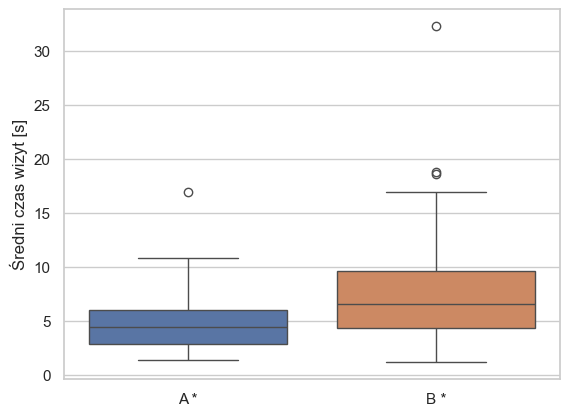

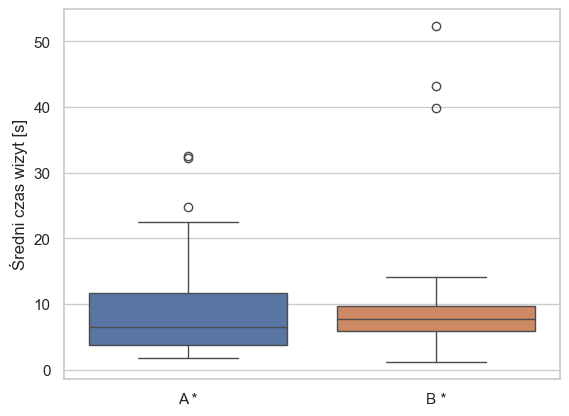

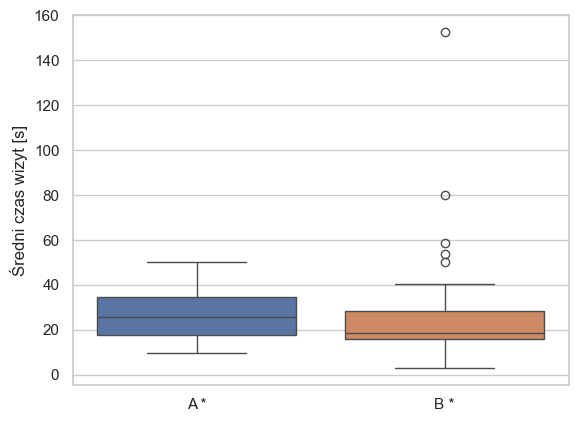

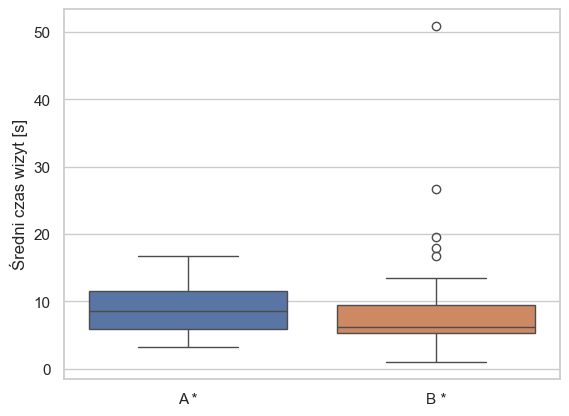

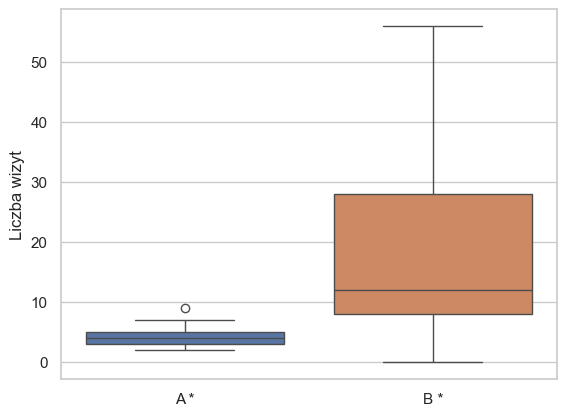

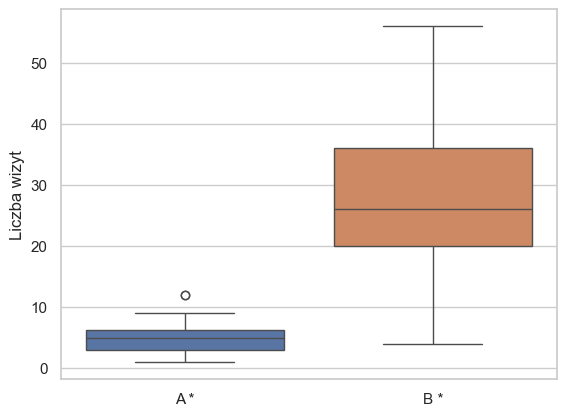

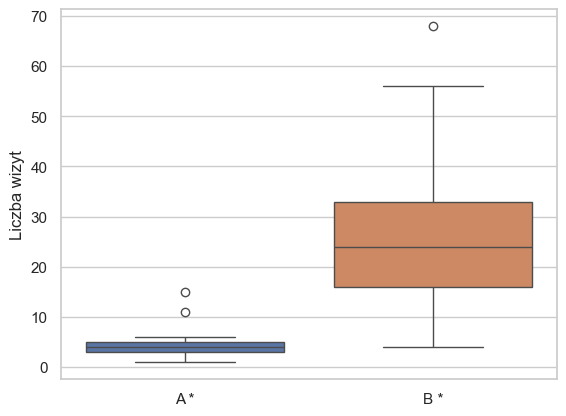

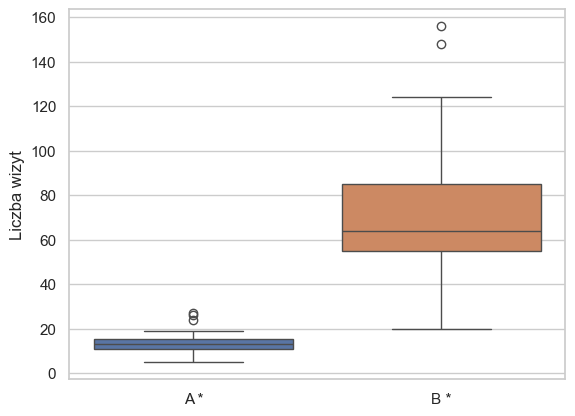

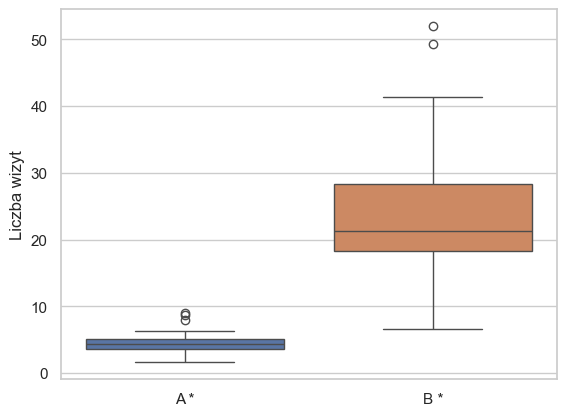

In [123]:
plots(df_multiply, visits, 'wizyt')

Podsumowanie:
W takim przypadku nadal dla większości jest istotna statystycznie różnica (więc nie ma prostego przełożenia, że to 1/4 wszystkich fiksacji...) poza: avg_visit_3, sum_avgVisit, avg_avgVisit 

In [124]:
import csv
with open('./results/mapaA_mapaB.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    row = []
    for item in results:
        if item != '\n':
            row.append(item)
        else:
            writer.writerow(row)
            row = []
    if row:  # Sprawdzamy, czy jest coś do zapisania w ostatnim wierszu
        writer.writerow(row)